# Table of contents
- [Importing dataset](importing-dataset)
- [Describing dataset](describing-dataset)
- [Checking for patterns in missing values](checking-for-patterns-in-missing-values)
- [Data visualization](Data-visualization)
    - univariate analysis
    - bivariate analysis
    - multivariate analysis

## Importing dataset

In [1]:
import polars as pl
import sys
sys.path.append("..")
from my_utils.data_utils import Preprocess

# Example Usage Without Creating an Object
data_2021_01 = pl.read_parquet("../data/fhvhv_tripdata_2021-01.parquet").pipe(Preprocess.reduce_memory_usage)
print(data_2021_01.shape)
data_2021_01.head()

Memory usage before: 1719.14 MB
Memory usage after: 1174.01 MB
(11908468, 24)


hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
str,str,str,datetime[ns],datetime[ns],datetime[ns],datetime[ns],i32,i32,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,str,str,str,str,str
"""HV0003""","""B02682""","""B02682""",2021-01-01 00:28:09,2021-01-01 00:31:42,2021-01-01 00:33:44,2021-01-01 00:49:07,230,166,5.26,923,22.280001,0.0,0.67,1.98,2.75,null,0.0,14.99,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02682""","""B02682""",2021-01-01 00:45:56,2021-01-01 00:55:19,2021-01-01 00:55:19,2021-01-01 01:18:21,152,167,3.65,1382,18.360001,0.0,0.55,1.63,0.0,null,0.0,17.059999,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02764""","""B02764""",2021-01-01 00:21:15,2021-01-01 00:22:41,2021-01-01 00:23:56,2021-01-01 00:38:05,233,142,3.51,849,14.05,0.0,0.48,1.25,2.75,null,0.94,12.98,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02764""","""B02764""",2021-01-01 00:39:12,2021-01-01 00:42:37,2021-01-01 00:42:51,2021-01-01 00:45:50,142,143,0.74,179,7.91,0.0,0.24,0.7,2.75,null,0.0,7.41,"""N""","""N""",""" ""","""N""","""N"""
"""HV0003""","""B02764""","""B02764""",2021-01-01 00:46:11,2021-01-01 00:47:17,2021-01-01 00:48:14,2021-01-01 01:08:42,143,78,9.2,1228,27.110001,0.0,0.81,2.41,2.75,null,0.0,22.440001,"""N""","""N""",""" ""","""N""","""N"""


## Describing dataset

In [2]:
data_2021_01.describe()

statistic,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str
"""count""","""11908468""","""11908468""","""8702389""","""11908464""","""8708453""","""11908468""","""11908468""",1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,5920.0,1.1908468e7,1.1908468e7,"""11908468""","""11908468""","""11908468""","""11908468""","""11908468"""
"""null_count""","""0""","""0""","""3206079""","""4""","""3200015""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1902548e7,0.0,0.0,"""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,"""2021-01-17 03:19:39.014393""","""2021-01-17 03:39:28.500086""","""2021-01-17 03:23:57.029844""","""2021-01-17 03:39:51.314894""",134.861551,138.619429,4.512292,954.289266,17.19294,0.709051,0.528512,1.482194,0.866981,0.0,0.499758,13.922398,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,76.600219,78.622775,5.020948,624.063597,13.244115,2.974593,0.452094,1.13261,1.280446,0.0,1.789407,11.088224,null,null,null,null,null
"""min""","""HV0003""","""B02395""","""B00446""","""2020-12-31 23:35:24""","""2020-12-31 23:49:22""","""2021-01-01 00:00:00""","""2021-01-01 00:02:42""",1.0,1.0,0.0,0.0,-246.899994,0.0,0.0,0.0,0.0,0.0,0.0,-11.65,"""N""","""N""",""" ""","""N""","""N"""
"""25%""",null,null,null,"""2021-01-09 12:30:23""","""2021-01-09 13:05:05""","""2021-01-09 12:34:14""","""2021-01-09 12:49:59""",69.0,71.0,1.56,524.0,8.7,0.0,0.26,0.75,0.0,0.0,0.0,6.68,null,null,null,null,null
"""50%""",null,null,null,"""2021-01-17 01:34:32""","""2021-01-17 00:54:21""","""2021-01-17 01:39:42""","""2021-01-17 01:54:22""",136.0,139.0,2.84,804.0,13.3,0.0,0.39,1.14,0.0,0.0,0.0,10.63,null,null,null,null,null
"""75%""",null,null,null,"""2021-01-24 19:03:31""","""2021-01-24 19:26:20""","""2021-01-24 19:07:45""","""2021-01-24 19:23:09""",208.0,213.0,5.57,1216.0,21.200001,0.0,0.64,1.85,2.75,0.0,0.0,17.280001,null,null,null,null,null
"""max""","""HV0005""","""B03136""","""B03153""","""2021-02-01 00:10:00""","""2021-01-31 23:59:44""","""2021-01-31 23:59:59""","""2021-02-01 03:23:22""",265.0,265.0,738.950012,59143.0,1532.670044,113.970001,47.849998,140.300003,5.5,0.0,200.0,1041.77002,"""Y""","""Y""","""N""","""Y""","""Y"""


## Checking for patterns in missing values

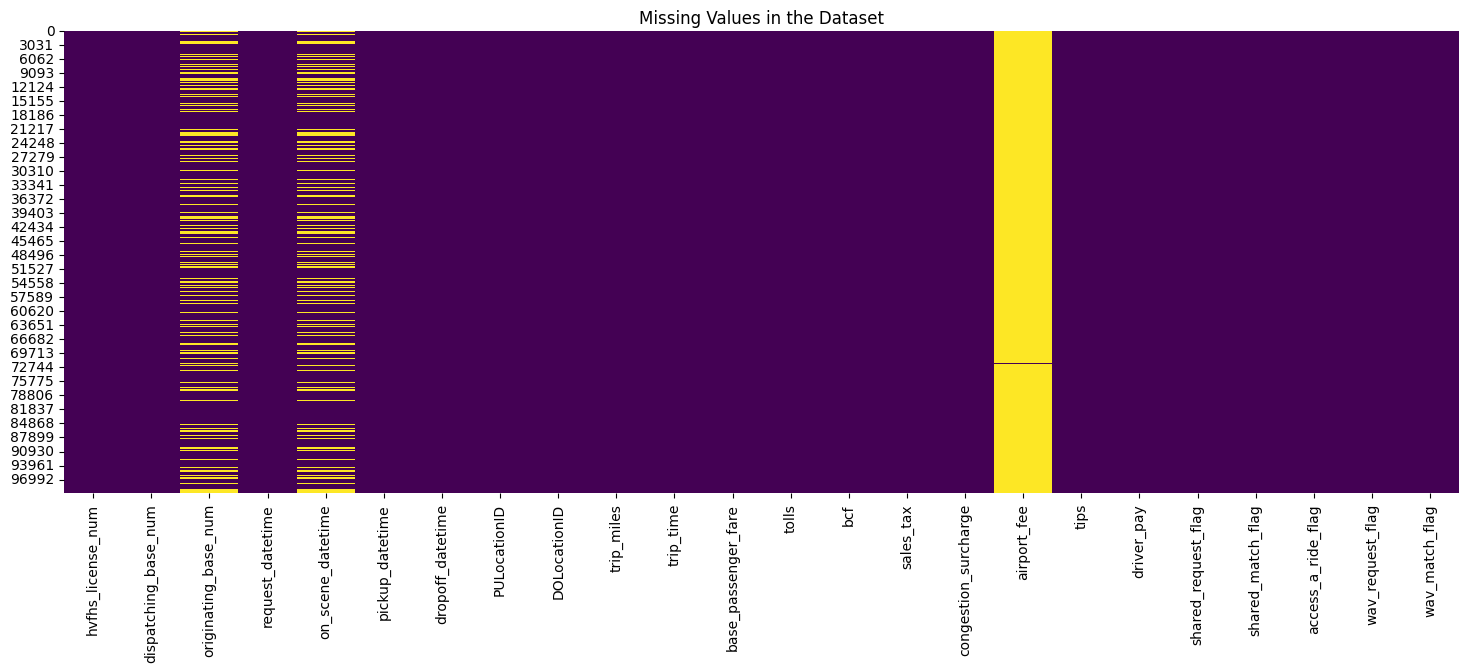

In [3]:
null_cols = ['originating_base_num','request_datetime', 'on_scene_datetime', 'airport_fee']
df_pandas = data_2021_01.sample(100000).to_pandas()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
# check any correlation between null columns in plot
sns.heatmap(df_pandas.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

- clear correlation in null values
- airportfee almost null

In [4]:
data_2021_01 = data_2021_01.drop('airport_fee')

## Data Visualization
- Univariate analysis

['hvfhs_license_num', 'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag']


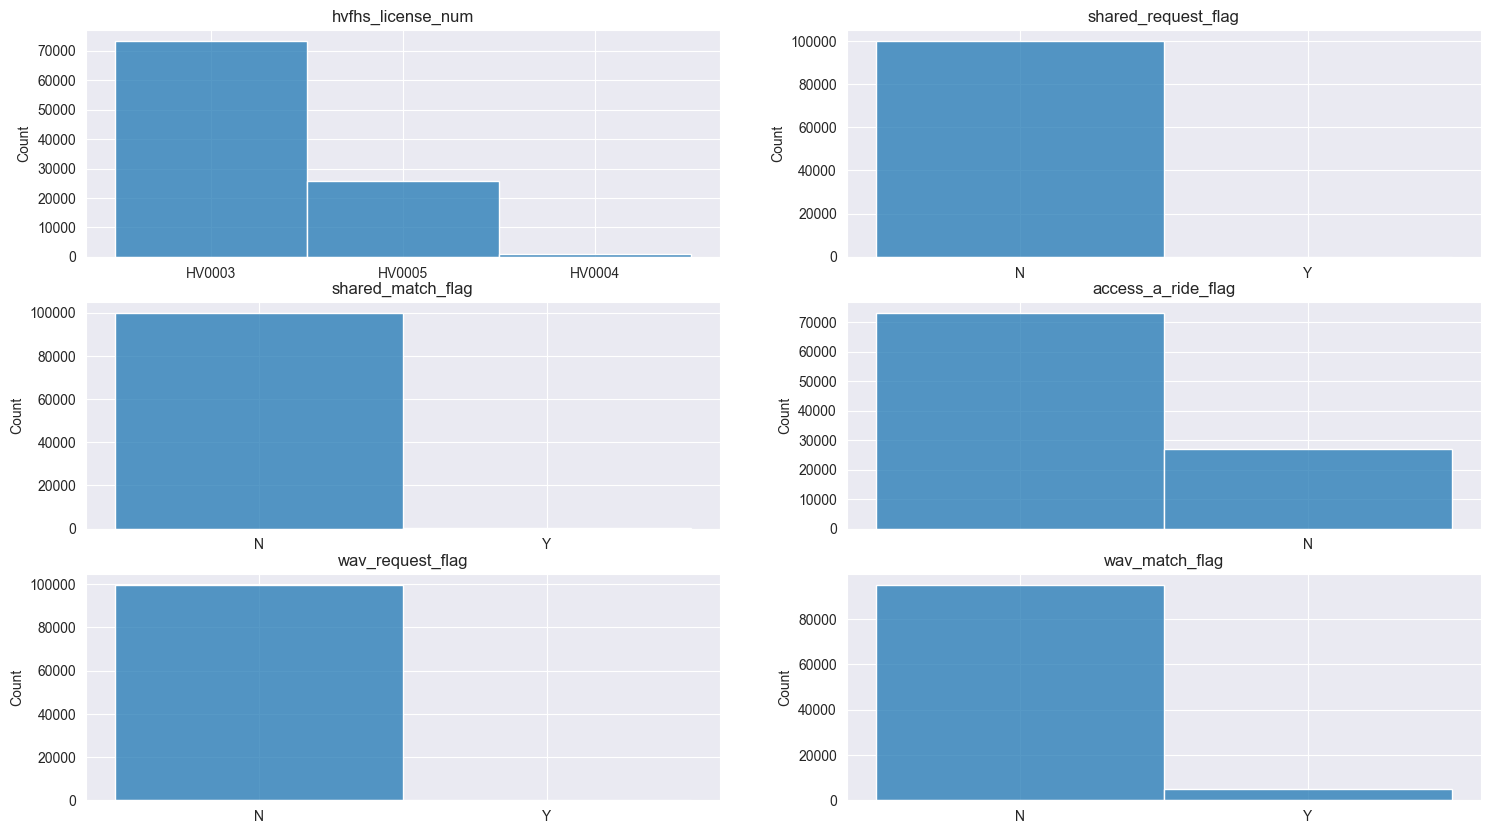

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
str_cols = [col for col in data_2021_01.columns if data_2021_01[col].dtype == pl.String]
cols = [col for col in str_cols if data_2021_01[col].n_unique() < 10]
print(cols)

# Plotting the distribution of the categorical columns
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize=(18, 10),nrows=3, ncols=2)
for i in range(len(cols)):
    sns.histplot(data_2021_01[cols[i]].sample(100000),ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(cols[i])
plt.show()

- `shared_request_flag`, `shared_match_flag`, `wav_request_flag`, `wav_match_flag`  are almost unihistograms
- `access_a_ride_flag` labels need to think 
- `hvfhs_license_num`, `dispatching_base_num` , `originating_base_num` other categorical columns temporarly dropped

In [6]:
data_2021_01 = data_2021_01.drop(['hvfhs_license_num', 'dispatching_base_num', 'shared_request_flag', 'originating_base_num', 'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag'])

In [7]:
# data_2021_01 = data_2021_01.with_columns(pl.Series(name='journey_time', values=data_2021_01['dropoff_datetime'] - data_2021_01['pickup_datetime']))
# data_2021_01 = data_2021_01.with_columns(pl.Series(name='reach_you_in', values=data_2021_01['on_scene_datetime'] - data_2021_01['request_datetime']))
# Total time
# data_2021_01 = data_2021_01.with_columns(pl.Series(name='total_time', values=data_2021_01['journey_time'] + data_2021_01['reach_you_in']))

# Extract dropoff date's year, month, day
data_2021_01 = data_2021_01.with_columns(pl.Series(name='dropoff_year', values=data_2021_01['dropoff_datetime'].dt.date()))


data_2021_01 = data_2021_01.drop(['pickup_datetime', 'dropoff_datetime', 'request_datetime', 'on_scene_datetime'])
data_2021_01

PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,tips,driver_pay,dropoff_year
i32,i32,f32,i32,f32,f32,f32,f32,f32,f32,f32,date
230,166,5.26,923,22.280001,0.0,0.67,1.98,2.75,0.0,14.99,2021-01-01
152,167,3.65,1382,18.360001,0.0,0.55,1.63,0.0,0.0,17.059999,2021-01-01
233,142,3.51,849,14.05,0.0,0.48,1.25,2.75,0.94,12.98,2021-01-01
142,143,0.74,179,7.91,0.0,0.24,0.7,2.75,0.0,7.41,2021-01-01
143,78,9.2,1228,27.110001,0.0,0.81,2.41,2.75,0.0,22.440001,2021-01-01
…,…,…,…,…,…,…,…,…,…,…,…
89,71,2.29,870,16.780001,0.0,0.5,1.49,0.0,0.0,12.06,2021-01-31
182,167,4.1,1093,17.190001,0.0,0.52,1.53,0.0,2.0,13.66,2021-01-31
167,169,2.4,904,19.530001,0.0,0.59,1.73,0.0,0.0,15.53,2021-02-01


In [8]:
data_2021_01.describe()

statistic,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,tips,driver_pay,dropoff_year
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""",1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,1.1908468e7,"""11908468"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",134.861551,138.619429,4.512292,954.289266,17.19294,0.709051,0.528512,1.482194,0.866981,0.499758,13.922398,"""2021-01-16 13:38:34.256000"""
"""std""",76.600219,78.622775,5.020948,624.063597,13.244115,2.974593,0.452094,1.13261,1.280446,1.789407,11.088224,null
"""min""",1.0,1.0,0.0,0.0,-246.899994,0.0,0.0,0.0,0.0,0.0,-11.65,"""2021-01-01"""
"""25%""",69.0,71.0,1.56,524.0,8.7,0.0,0.26,0.75,0.0,0.0,6.68,"""2021-01-09"""
"""50%""",136.0,139.0,2.84,804.0,13.3,0.0,0.39,1.14,0.0,0.0,10.63,"""2021-01-17"""
"""75%""",208.0,213.0,5.57,1216.0,21.200001,0.0,0.64,1.85,2.75,0.0,17.280001,"""2021-01-24"""
"""max""",265.0,265.0,738.950012,59143.0,1532.670044,113.970001,47.849998,140.300003,5.5,200.0,1041.77002,"""2021-02-01"""


In [9]:
# data_2021_01 = data_2021_01.with_columns(pl.col('total_time').dt.total_seconds())
# data_2021_01 = data_2021_01.with_columns(pl.col('journey_time').dt.total_seconds())
# data_2021_01 = data_2021_01.with_columns(pl.col('reach_you_in').dt.total_seconds())
# data_2021_01

## Drop colums temp

In [10]:
data = data_2021_01.sample(100000,seed=42).select(['PULocationID', 'DOLocationID', 'trip_miles', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'trip_time'])
X = data.drop('trip_time').to_pandas()
y = data['trip_time'].to_pandas()
X

,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge
0,167,167,0.520,6.330000,0.00,0.19,0.56,0.00
1,168,136,5.230,17.219999,0.00,0.52,1.53,0.00
2,194,7,4.695,16.530001,5.79,0.67,1.98,0.00
3,228,256,6.730,29.219999,0.00,0.00,2.07,0.00
4,159,116,2.830,13.440000,0.00,0.40,1.19,0.00
...,...,...,...,...,...,...,...,...
99995,142,142,0.870,7.940000,0.00,0.24,0.70,2.75
99996,242,259,5.655,16.670000,0.00,0.50,1.48,0.00
99997,14,14,1.180,7.910000,0.00,0.24,0.70,0.00
99998,241,60,3.810,18.840000,0.00,0.57,1.67,0.00


In [11]:
len_data = X.shape[0]
X_train, X_test, y_train, y_test = X[:int(0.8*len_data)], X[int(0.8*len_data):], y[:int(0.8*len_data)], y[int(0.8*len_data):]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 8) (20000, 8) (80000,) (20000,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('transfomer', StandardScaler()),
    ('model', LinearRegression())
], memory= 'tran_cache')
model.fit(X_train, y_train)

Pipeline(memory='tran_cache',
         steps=[('transfomer', StandardScaler()),
                ('model', LinearRegression())])

In [13]:
model.score(X_test,y_test)

0.7439049632828462